## Testeo de ECGSignal

Importando librerias

In [2]:
import sys
import os
project_path=os.path.abspath("..")
sys.path.insert(0,project_path)
from RawSignal import RawSignal
from ECGSignal import ECGSignal
import numpy as np
from Info import Info
from Anotations import Anotaciones

Cargamos señal de ECG

In [3]:
ecg_data=np.load("..\data\ecg\ecg.npy")
ecg_data=np.reshape(ecg_data,(1,388971)) #Cambiamos el shape para poder pasarsela a RawSignal q acepta arrays de (n_canal,n_muestras)
fs=512 #establecemos frecuencia de muestreo
ecg_data=-1*ecg_data #La señal que cargamos esta dada vuelta, por eso la multiplicamos por -1


Creamos objetos info y anotaciones

In [4]:
info = Info(sfreq=fs,ch_types= "ECG")

In [5]:
import pandas as pd
#El csv de eventos de ecg esta en muestras como en RawSignal asumimos q onset es en segundos lo vamos a pasar a segundos
df = pd.read_csv("..\data\ecg\eventos_ecg.csv")
df['onset'] = df['onset'] / fs
output_path = "..\data\ecg\datos_convertidos_ecg.csv"
df.to_csv(output_path, index=False)
anotaciones= Anotaciones()
anotaciones.load("..\proyecto\data\ecg\datos_convertidos_ecg.csv")


Creamos objeto raw_ecg

In [6]:
raw_ecg= RawSignal(data=ecg_data,sfreq=fs,info=info,anotaciones=anotaciones)

In [7]:
%matplotlib tk

Ploteamos la señal de ECG

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Creating RawArray with float64 data, n_channels=1, n_times=321757
    Range : 0 ... 321756 =      0.000 ...   628.430 secs
Ready.
Using matplotlib as 2D backend.


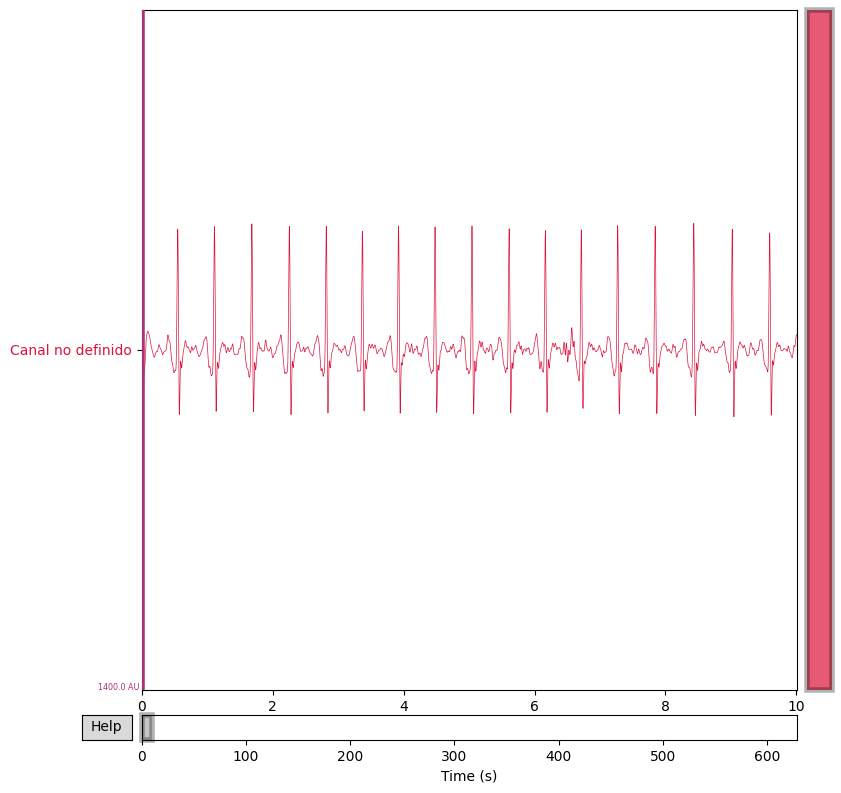

In [8]:
raw_recortado= raw_ecg.cut_before_event() #Hacemos esto para poder ver mejor la señal y saltearnos el inicio donde hay un poco de ruido
raw_recortado= raw_recortado.filter(l_freq=5,h_freq=36)
raw_recortado=raw_recortado.remove_segment(300,400)
raw_recortado.plot(scalings=700)


Creamos objeto ECGSingal

In [9]:
ecg_signal=ECGSignal(raw_recortado) #Vamos a trabajar con raw_recortado asi no tenemos la parte que tiene ruido

Creating RawArray with float64 data, n_channels=1, n_times=321757
    Range : 0 ... 321756 =      0.000 ...   628.430 secs
Ready.


Metodo detectar picos R

In [10]:
picos=ecg_signal.detectar_picos_R()
for pico in picos:
    print(pico.shape)

(831,)


Metodo para calcular la frecuencia cardiaca

In [11]:
fc=ecg_signal.calcular_frecuencia_cardiaca()
print(f"La frecuencia cardiaca es {fc[0]} lpm")

La frecuencia cardiaca es 79.3613147205752 lpm


Ploteamos la señal con sus picos

In [12]:
ecg_signal.graficar_señal_con_picos()

Metodo para mostrar la gráfica tiempo-frecuencia

In [13]:
ecg_signal.calcular_tfr()

(array([[3.36126458e+04, 3.36126922e+04, 3.36110979e+04, ...,
         3.73791403e+02, 3.73877475e+02, 3.73945234e+02],
        [1.29176326e+05, 1.29674173e+05, 1.30151213e+05, ...,
         2.37742355e+03, 2.35119135e+03, 2.32507917e+03],
        [2.00160280e+05, 2.01913823e+05, 2.03605134e+05, ...,
         6.39804187e+03, 6.29235011e+03, 6.18689556e+03],
        ...,
        [2.45874420e+04, 2.59624189e+04, 2.70725855e+04, ...,
         8.05525976e+01, 7.16703105e+01, 6.34126589e+01],
        [1.95205953e+04, 2.05721946e+04, 2.13718662e+04, ...,
         6.88135245e+01, 6.14248345e+01, 5.44363059e+01],
        [1.55374250e+04, 1.63186249e+04, 1.68598897e+04, ...,
         5.66535090e+01, 5.07777342e+01, 4.51122023e+01]]),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        6.28425781e+02, 6.28427734e+02, 6.28429688e+02]))